# Import Dependencies

In [6]:
import numpy as np
from scipy.stats import multivariate_normal
import pandas as pd
from tqdm import tqdm
from datetime import datetime
import pdb
import matplotlib.pyplot as plt
%matplotlib inline

# Gaussian Mixture Model Definition

In [17]:
class GaussianMixtureModel:
    
    def __init__(self, X, **kwargs):
        self.X = X
        self.N,self.D = X.shape
        self._set_options(**kwargs)
    
    def _set_options(self, **kwargs):
        self.epochs = kwargs['epochs'] if 'epochs' in kwargs else 30
        self.threshold = kwargs['threshold'] if 'threshold' in kwargs else 1e-2
        self.early_break = kwargs['early_break'] if 'early_break' in kwargs else True

#     def distance2(self):
#         self.D2 = np.sum( ( self.X - self.m.reshape([self.K,1,self.D]) )**2 , axis=2 )
    
    def responsibility(self, K):
        self.r = (self.pi * np.array([ multivariate_normal(self.X, self.mu[k,:], self.Sigma[k,:,:]) for k in range(K) ])) / np.array([ self.pi[k] * multivariate_normal(self.X, self.mu[k,:], self.Sigma[k,:,:]) ]).sum(axis=1, keepdims=True)
    
    def mean(self):
        return np.array([self.r * self.X]).sum(axis=1) / np.array([self.r]).sum(axis=1, keepdims=True)
    
    def covariance(self):
        return ( (self.X-self.mu)@(self.X-self.mu).T ).sum(axis=0)
    
    def fit(self):
        pass

# Example

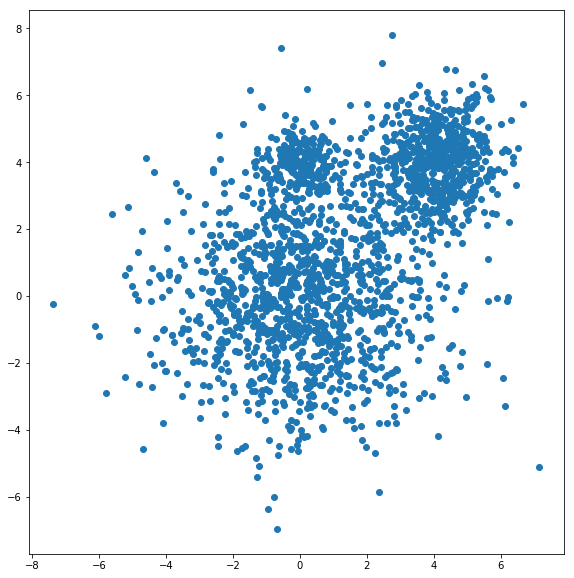

In [21]:
df = pd.read_csv("../data/gmm.csv", names=['x', 'y'], header=None)
gmm = GaussianMixtureModel(df.values)


fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(df.x, df.y)
ax.set_aspect(1)

In [24]:
gmm.responsibility(3)

AttributeError: 'GaussianMixtureModel' object has no attribute 'pi'